# Programação I (LTI)

## Capítulo - Iteração

2020/21 -- João Pedro Neto, DI/FCUL

Ao contrário dos seres humanos, os computadores são óptimos para tarefas repetitivas. Se eu quiser somar os primeiros 100000 números primos tenho a certeza que um programa Python é capaz de calcular o resultado eficientemente e sem margem para erro.

Até agora, os métodos que discutimos para realizar tarefas repetitivas são: (a) listas por compreensão, e (b) uso da recursão.

Neste capítulo vamos introduzir um terceiro método: a iteração.

A iteração é uma forma de pensar tão comum que o Python até disponibiliza diferentes comandos para o fazer. É costume chamar a estes comandos, *comandos de ciclo*.

O seguinte programa apresenta o primeiro comando de ciclo, o `while`:

In [ ]:
i = 1
while i < 5:
  print(i)
  i = i + 1

Se lermos o programa como se fosse Português (ou Inglês, neste caso) seria algo como: 

<center><i>seja i=1, enquanto o i for menor que 5 repete os seguintes comandos: imprimir i e atualizar i para o seu sucessor.</i></center>

Temos aqui alguns pontos a considerar:

+ A noção de *repetição* (sinónimo de iteração). Há um conjunto de comandos que estão a ser repetidamente executados. Este conjunto de comandos designa-se **corpo do ciclo**.

+ A noção que a repetição tem associada uma *condição de paragem*. Esta condição é uma expressão booleana que, enquanto for considerada verdadeira, mantém a repetição ativa. A esta expressão booleana designamos por **guarda do ciclo**.

+ A existência de uma variável (neste exemplo, a variável inteira `i`) que é importante tanto para a execução do corpo do ciclo, como para determinar quando devemos parar. A esta variável designamos por **variável de progresso**.

A sintaxe do Python em relação ao comando `while` é, assim

    while <guarda-do-ciclo>:
        <corpo-do-ciclo>

Vamos definir uma função que imprime a tabela da tabuada de um certo número. Como a tabuada vai da linha 1 à linha 10, podemos pensar num ciclo que repete dez vezes a respetiva conta.


In [ ]:
def tabuada(n):
  linha = "{0} vezes {1:2d} igual a {2:2d}"
  i = 1
  while i <= 10:
    print(linha.format(n,i,n*i))
    i = i + 1

tabuada(3)    

Leiam a função `tabuada` e identifiquem o corpo e a guarda do ciclo, bem como a variável de progresso.

Vejamos outro exemplo. 

Considere o seguinte algoritmo: Seja um número $n$. Se $n=1$ paramos. Senão, se $n$ for par, dividimos por 2, e se for ímpar, multiplicamos por 3 e adicionamos 1. Com este novo número, repetir o algoritmo.



In [ ]:
def collatz(n):
  while n != 1:
    print(n, end= " ")
    if n%2 == 0: # n par
      n = n//2
    else:        # n ímpar
      n = n*3+1
  print(1)

# imprimir a sequência para n de 1 a 20
n = 1
while n <= 20:
  collatz(n)
  n = n +1

A [conjetura de Collatz](https://pt.wikipedia.org/wiki/Conjectura_de_Collatz) diz-nos que para qualquer número positivo, este algoritmo termina sempre. Ninguém foi ainda capaz de demonstrar que a conjetura é verdade.  

Mas se fosse falsa, se houvesse um $n$ contra-exemplo, teríamos uma consequência curiosa: para esse $n$ *o ciclo acima nunca terminaria*.

De qualquer forma, não é preciso citar conjeturas matemáticas para encontrar ciclos que talvez não terminem. Este singelo ciclo não termina de certeza:

In [ ]:
i = 1
while i < 2:
  print(i) 

Se executarem a caixa de código, vão ter de clicar no botão *stop*. Qual é o problema deste ciclo? É que a variável de progresso não está a ser atualizada. Assim, a guarda do ciclo é sempre verdadeira. A estes ciclos cuja guarda nunca é falsa designamos por **ciclos infinitos**.

Excetuando certas situações muito específicas, queremos naturalmente evitar ciclos infinitos.

Há aqui um raciocínio paralelo com a recursão:

+ Para evitar recursões infinitas temos de invocar subproblemas mais simples para que estes se aproximem da base da recursão

+ Para evitar ciclos infinitos temos de executar corpos de ciclos onde a variável de progresso evolua para invalidar a guarda do ciclo

No exemplo seguinte, imprimimos os número de 1 a 20 por ordem decrescente:

In [ ]:
i = 20
while i>0:
  print(i, end=" ")
  i = i - 1

O ciclo termina porque a variável de progresso `i` começa no valor 20 e vai descendo uma unidade cada vez que o corpo do ciclo é executado. Como a guarda do ciclo só se mantém verdade enquanto `i` for positivo, temos a garantia que o ciclo irá terminar.

Esta garantia que o ciclo termina nem sempre é óbvia. Como observámos na conjetura de Collatz ainda ninguém sabe se o ciclo, começando num certo número, termina ou não! 

Noutras situações sabe-se o dado ciclo termina mas para tal é preciso analisar o algoritmo e encontrar um argumento apropriado que garanta a sua terminação.



---



### Exemplo: Cálculo da Raiz Quadrada

Vamos calcular a raiz quadrada de $a$ pelo método de Newton. Este método descreve o seguinte algoritmo: seja uma aproximação $x$ de $\sqrt{a}$. Então consegue-se calcular uma melhor aproximação com a expressão

$$y = x - \frac{x^2 - a}{2x}$$

Se repetirmos isto muitas vezes, obtemos aproximações muito boas da raiz quadrada.

Não nos vamos preocupar com o argumento matemático que explica a correção este algoritmo. Vamos confiar no Newton, que era um rapaz inteligente. Mas queremos implementar este algoritmo.

Fazer esta conta não é difícil, são operações aritméticas. O mais subtil é quando decidir parar. Se $x$ fosse a resposta, ie, $x = \sqrt{a}$, então fazendo as contas, $y=\sqrt{a}$ também. E se continuássemos a tentar melhores aproximações entraríamos num ciclo infinito. Podíamos parar este processo comparando se $x$ e $y$ são iguais. Mas pior é se nunca chegarmos exatamente ao resultado pretendido. 

Para lidar com estes casos a melhor abordagem é definir uma margem de erro satisfatória. Ou seja, se o erro da aproximação for menor que a margem de erro definida, ficamos satisfeitos e paramos a iteração. Esta vai ser a nossa condição de paragem.

In [ ]:
import math

def sqrtNewton(a, erro=1e-9):  # 1e-9 é notação para 10^-9
  x = a       # o nosso primeiro candidato
  while (abs(x*x - a) >= erro):
    y = x - (x*x - a)/(2*x)
    x = y
  return x

print(sqrtNewton(2))
print(math.sqrt(2))   # para comparar

Vamos aproveitar este exemplo para imprimir uma tabela onde escrevemos lado a lado a nossa aproximação vs a aproximação do Python para vários números, mostrando também a diferença entre as duas aproximações.

In [ ]:
def relatorio(nMax):
  linha = "n: {0:<2.0f} Newton: {1:10.8f}  Python: {2:10.8f}  dif: {3:10.8f}"

  n = 1.0
  while (n <= nMax):
    newton = sqrtNewton(n)
    python = math.sqrt(n)
    print(linha.format(n, newton, python, abs(newton-python)))
    n = n + 1.0

relatorio(15)  



---



Considerem agora o seguinte problema: queremos implementar uma função `pesquisa(x, xs)` que recebe um elemento `x` e uma lista `xs` e devolve o primeiro índice onde `x` se encontra na lista. Se não se encontrar devolve `len(xs)`.

Primeira versão usando o `while`:

In [ ]:
def pesquisa(x, xs):
  i = 0
  resultado = len(xs)

  while i < len(xs):
    if x == xs[i]:
      resultado = i
    i = i + 1
    
  return resultado

pesquisa(3, [1,3,2,4,3])

4

Não funcionou. Devia ter devolvido `1` que é o primeiro índice onde o 3 se encontra. Conseguem ver porquê? É que após encontrar a primeira ocorrência, o ciclo continua a iterar até ao fim da lista. Ou seja, esta função está a devolver o índice da última ocorrência.

Segunda versão:

In [ ]:
def pesquisa(x, xs):
  i = 0
  resultado = len(xs)

  while i < len(xs):
    if x == xs[i] and resultado == len(xs):
      resultado = i
    i = i + 1
  
  return resultado

pesquisa(3, [1,3,2,4,3])

1

Boa! Já funciona (ou parece que funciona, convinha fazer mais testes 😉). Mas ainda há um problema. Quando descobrimos o que queremos, para quê continuar a percorrer a lista até ao fim? Não parece muito eficiente (e não é!).

Como resolver esta questão? Podemos incorporar na guarda esta informação. Ou seja, em vez de pararmos apenas no fim da lista, podemos parar *também* se encontrarmos o que queremos.

Ok, terceira versão:

In [ ]:
def pesquisa(x, xs):
  i = 0
  resultado = len(xs)

  while i < len(xs) and resultado == len(xs):
    if x == xs[i]:
      resultado = i
    i = i + 1

  return resultado

pesquisa(3, [1,3,2,4,3])

1

A esta técnica designa-se **reforçar a guarda**. Com a guarda reforçada escusamos de iterar mais vezes que as necessárias. Mais um elogio à preguiça!



---



O segundo comando para iteração é o `for`. Nós já conhecemos esta palavra reservada associada aos geradores das listas de compreensão. Aqui vai ter um significado um pouco diferente, mas é como se extraíssemos o gerador e o deixássemos à solta!

Um ciclo `for` determina o número de iterações que queremos fazer, sem ser preciso atualizar a variável de progresso no corpo do ciclo. Por exemplo:

In [ ]:
for i in range(3):
  print(i)

for i in "abc":
  print(i)

for i in (True, 1.0, "x"):
  print(i)  

for i in ["ab", "cd"]:
  print(i)    

for i in [10,20,30,40]:
  print(i)  

Vamos implementar a função `filtro` que dado um predicado `p` e uma lista `xs`, devolve a sublista apenas com os elementos de `xs` que satisfazem o predicado `p`.

In [ ]:
def filtro(p, xs):
  resultado = []
  for elemento in xs:
    if p(elemento):
      resultado.append(elemento)
  return resultado

def ePar(n):
  return n % 2 == 0

filtro(ePar, [1,2,3,4,5,6,7,8])

[2, 4, 6, 8]

Vamos agora reimplementar a função `tabuada`:

In [ ]:
def tabuada(n):
  linha = "{0} vezes {1:2d} igual a {2:2d}"
  for i in range(1,11):
    print(linha.format(n,i,n*i))

tabuada(3) 

3 vezes  1 igual a  3
3 vezes  2 igual a  6
3 vezes  3 igual a  9
3 vezes  4 igual a 12
3 vezes  5 igual a 15
3 vezes  6 igual a 18
3 vezes  7 igual a 21
3 vezes  8 igual a 24
3 vezes  9 igual a 27
3 vezes 10 igual a 30


Quando é preciso efetuar uma iteração, o critério típico para escolher entre o `while` e o `for` é o seguinte:

+ Se não sabemos ao certo quantas iterações vão ser realizadas, escolhemos o ciclo `while`. As funções `collatz` e `sqrtNewton` são bons exemplos.

+ Se sabemos exatamente quantas iterações vão ser realizadas, optamos pelo `for`. Exemplos são as funções `tabuada` ou `filtro`.

Há um caso curioso entre estas duas, a função `pesquisa`. Por um lado sabemos que no máximo vamos iterar o tamanho da lista. mas por outro lado não sabemos bem quantas vezes a iteração tem de acontecer. Vai depender da posição do elemento que estamos a pesquisar.

Com o que sabemos, a opção deve ser o `while`. Até porque o `for` itera até ao fim do gerador associado. Porém, o Python possui um comando que nos pode ajudar nestas situações. O comando `break` quando executado, faz a execução do programa sair do ciclo onde este se encontra:

In [ ]:
def pesquisa(x, xs):
  resultado = len(xs)

  for i in range(len(xs)):
    if x == xs[i]:
      resultado = i
      break  # encontramos, podemos sair de imediato

  return resultado

pesquisa(3, [1,3,2,4,3])

1

O comando `break` é relativamente polémico no ensino da programação. O argumento é que torna possível escrever código desorganizado, tornando mais difícil a interpretação, depuração e manutenção de programas.

Como qualquer ferramenta devemos usar o `break` apenas nos momentos certos. O seu uso ao longo da disciplina será escasso. Quando possível, daremos preferência ao reforço da guarda nos ciclos `while`, mas esta é a forma indicada de sair a meio de ciclos `for`.

Por fim, considero importante conhecerem o comando. Até porque faz parte da aprendizagem ler código escrito por terceiros, e inevitavelmente este comando irá por lá aparecer.



---



Os comandos ciclos são, claro está, comandos. Isto significa que podemos ter ciclos no corpo de outros ciclos. Por vezes estas iterações dentro de iterações são a melhor forma de resolver certos problemas.

Vamos considerar que queríamos imprimir as primeiras $m$ tabuadas. Já vimos que para imprimir *uma* tabuada usámos um ciclo. O outro ciclo servirá para repetir a tarefa de imprimir $m$ tabuadas. 

Como sabemos exatamente quantas iterações terão de ser realizadas, escolhemos dois ciclos `for`:

In [ ]:
# vamos imprimir uma tabuada na mesma linha para poupar espaço
def tabuadas(m):
  linha = "{0:02}x{1:02}={2:03}"

  for n in range(1,m+1):   # 1ºciclo: iterar entre 1 e m,      usar variável de progresso n
    for i in range(1,11):  # 2ºciclo: imprimir a tabuada do n, usar variável de progresso i
      print(linha.format(n,i,n*i), end=" ")
    print() # mudar de linha

tabuadas(10)    

A variável de progresso de um ciclo pode ser usada para determinar a evolução de variável de progresso do ciclo interno:

In [ ]:
fmt = "i={0},j={1} "

for i in range(4):
  for j in range(1,i+1):
    print(fmt.format(i, j), end=' ')



---

### Aplicação: O método da Bissecção

Vamos considerar uma outra técnica para calcular a raíz quadrada de um número $n$: o método da bissecção.

Este método começa com um intervalo de pesquisa $[a,b]$ onde sabemos se encontrar a solução. 

O método então escolhe o valor do meio $x = \frac{a+b}{2}$ que chamamos o *candidato* à solução. Enquanto este candidato possuir um erro maior que a margem de erro máxima, executamos uma iteração de um ciclo. 

Neste ciclo, verificamos se o candidato $x$ é menor ou maior que a solução que procuramos. No caso da raiz quadrada, a pergunta seria $x^2 < n$? Se for menor, então procuramos on intervalo $[a,x]$, senão procuramos on intervalo $[x,b]$.

Ou seja, em cada iteração cortamos o intervalo de pesquisa em metade. Isto faz com que o método de bissecção seja bastante rápido a encontrar um candidato dentro da margem de erro.

No gráfico seguinte podemos observar como evoluem os vários valores de $x$ e quão rápido o intervalo de pesquisa converge para a solução desejada.

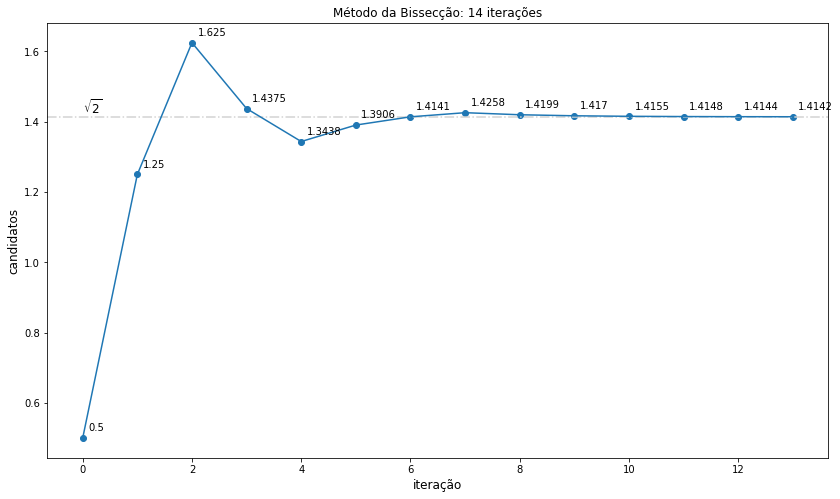

In [ ]:
#@title 
import math
import matplotlib.pyplot as plt

def sqrtBisseccaoResultados(n, erro=0.0001):
  a = min(n, -1)    # a <= n**(1/3) <= b
  b = max(n, 1)
  x = (a + b) / 2.0
  resultados = [x]

  while abs(x**2 - n) >= erro:
      if x**2 < n:
          a = x
      else:
          b = x
      x = (a + b) / 2.0
      resultados.append(x)

  return resultados

#ref: https://xavierbourretsicotte.github.io/Intro_optimization.html
n = 2
resultados = sqrtBisseccaoResultados(n)
xs = list(range(len(resultados)))
ys = resultados

fig, ax = plt.subplots(figsize=(14, 8))
plt.xlabel('iteração', fontsize=12)
plt.ylabel('candidatos', fontsize=12);
ax.axhline(math.sqrt(n), ls='-.', color='lightgrey')
ax.annotate('$\sqrt{2}$', (0, math.sqrt(n)+0.01), fontsize=12);
ax.plot(xs,ys)
ax.scatter(x = xs,y = ys)
ax.set_title('Método da Bissecção: {} iterações'.format(len(resultados)))

#Loop to add text annotations to the iteration points
for i in range(len(resultados)):
   ax.annotate(round(resultados[i],4), (xs[i]+0.1, ys[i]+0.02))

A função seguinte usa o método da bissecção para encontrar uma aproximação de $\sqrt{n}$ dentro da precisão desejada.

In [ ]:
def sqrtBisseccao(n, erro=1e-9):
  a = min(n,0)       # restrição: a <= x <= b
  b = max(n,1)
  x = (a + b) / 2.0

  while abs(x**2 - n) >= erro:
      if x**2 < n:
          a = x
      else:
          b = x
      x = (a + b) / 2.0

  return x

print(sqrtBisseccao(2))
print(sqrtNewton(2))    # para comparar
print(math.sqrt(2))     # para comparar



---

### Exercícios

<font size="+4" color="blue;green"><b>?</b></font> Defina a função `potencias2Ate(limite)` que devolve a lista de todas as potências de dois até o número limite dado (exclusive).



In [ ]:
def potencias2Ate(limite):
  lista = []
  cnt = 0
  while 2**cnt < limite:
    lista.append(2**cnt)
    cnt += 1
  return lista
potencias2Ate(64)

[1, 2, 4, 8, 16, 32]



---



<font size="+4" color="blue;green"><b>?</b></font> Defina a função `triangulares(limite)` que devolve a lista de todos os [números triangulares](https://en.wikipedia.org/wiki/Triangular_number) até o número limite dado (exclusive).



In [ ]:
def triangulares(limite):
  lista = []
  cnt = 0
  while cnt*(cnt+1)//2 < limite:
    lista.append(cnt*(cnt+1)//2)
    cnt += 1
  return lista
triangulares(667)

[0,
 1,
 3,
 6,
 10,
 15,
 21,
 28,
 36,
 45,
 55,
 66,
 78,
 91,
 105,
 120,
 136,
 153,
 171,
 190,
 210,
 231,
 253,
 276,
 300,
 325,
 351,
 378,
 406,
 435,
 465,
 496,
 528,
 561,
 595,
 630,
 666]



---



<font size="+4" color="blue;green"><b>?</b></font> Uma [progressão geométrica](https://pt.wikipedia.org/wiki/Progress%C3%A3o_geom%C3%A9trica) é uma sequência onde cada termo, a partir do segundo, é igual ao produto do anterior por uma constante. Esta constante designa-se por razão.

Defina a função `progressaoGeometrica(x0, r, n)` que devolve os primeiros $n$ termos da progressão geométrica começando em `x0` com razão `r`.



In [ ]:
def progressaoGeometrica(x0, r, n):
  for x in range(n):
    x0 *= r
  return x0
progressaoGeometrica(5, 10, 4)

50000

Implemente definições alternativas usando: (a) listas por compreensão, (b) recursividade.

In [ ]:
# falta lista por compreensao
def progressaoGeometricaRecur(x0, r, n):
  if n == 0:
    return x0  
  return progressaoGeometricaRecur(x0*r, r, n-1)

progressaoGeometricaRecur(5, 10, 4)

50000



---



A seguinte função encontra os índices onde ocorre uma dada letra numa dada frase:

In [ ]:
def indices(letra, frase):
  i = 0
  resultado = []

  for c in frase:
    if (c==letra):
      resultado.append(i)
    i = i + 1

  return resultado

print(indices('a', 'banana'))  

[1, 3, 5]


Este tipo de programa onde é preciso ter uma variável de progresso para guardar o índice corrente é tão comum, que o Python tem uma forma alternativa. A função `enumerate` é capaz de gerar uma variável de graça, para além da informação habitual:

In [ ]:
def indices(letra, frase):
  resultado = []

  for (i,c) in enumerate(frase):
    if(c==letra):
      resultado.append(i)

  return resultado

print(indices('a', 'banana'))  

[1, 3, 5]


<font size="+4" color="blue;green"><b>?</b></font> Defina a função `imprimeNums` que recebe uma lista de *strings* e as apresenta com um índice de linha usando o `enumerate` para gerar esses índices.

In [ ]:
listaFrases = ['def fac(x)', '  if x==0:', '    return 1', '  return x * fac(x-1)']

def imprimeNums(frases):
  return list(enumerate(frases))

imprimeNums(listaFrases)   

[(0, 'def fac(x)'),
 (1, '  if x==0:'),
 (2, '    return 1'),
 (3, '  return x * fac(x-1)')]



---



<font size="+4" color="blue;green"><b>?</b></font> Defina a função `fatores(n)` que devolve uma lista com todos os fatores do inteiro positivo $n$.



In [ ]:
def fatores(n):
  return list(set([x for x in range(1, n) if n%x == 0]))

fatores(40)

[1, 2, 4, 5, 8, 10, 20]



---



<font size="+4" color="blue;green"><b>?</b></font> Defina o predicado `ePrimo(n)` que verifica se o inteiro positivo $n$ é um número primo. Utilize a função `fatores` nesta implementação.



In [ ]:
def ePrimo(n):
  return len(fatores(n)) == 1

ePrimo(47)

True



---



<font size="+4" color="blue;green"><b>?</b></font> Defina novamente o predicado para saber se um número é primo. Mas agora vamos utilizar um algoritmo diferente:

+ O número 2 é primo, todos os restantes pares não são primos

+ Para um número ímpar $n$, verifique se encontra divisores ímpares entre $3$ e $\sqrt{n}+1$. Se encontrar algum divisor, pode sair de imediato sabendo que o número não é primo. Caso contrário, o número é primo.


In [ ]:
import math
def ePrimo_v2(n):
  if n == 2:
    return True
  if n % 2 == 0:
    return False
  
  for x in range(3, math.ceil(math.sqrt(n)) + 2, 2):
    if n % x == 0:
      return False
  return True
ePrimo_v2(47)

True

Podemos testar o desempenho destas duas soluções. A seguinte função `cronometro` consegue medir o tempo que demora uma execução de função para um dado valor do seu parâmetro.

A escolha de diferentes algoritmos para resolver um problema pode ter um forte impacto nos recursos necessários para encontrar a solução do problema. Neste caso irão observar que a segunda função é cerca de 7000x mais rápida a verificar se o número `9999991` é primo.

In [ ]:
import time

def cronometro(f, *args):  # *args permite receber múltiplos parâmetros
  t0 = time.time()
  f(*args)
  t1 = time.time() - t0
  print("{0:0.3f} ms".format(1000*t1))  # tempo em milisegundos

cronometro(ePrimo,    9999991)
cronometro(ePrimo_v2, 9999991)

664.136 ms
0.128 ms




---



<font size="+4" color="blue;green"><b>?</b></font> Defina a função `contaPrimos(a,b)` que devolve quantos números primos existem de $a$ a $b$ (inclusive).



In [ ]:
def contaPrimos(a, b):
  return [ePrimo_v2(x) for x in range(a, b+1)].count(True)

print( contaPrimos(2,100) )    

24




---



<font size="+4" color="blue;green"><b>?</b></font> A [encriptação ROT](https://www.dcode.fr/rot-cipher) é um método de encriptar mensagens de texto. O general romano Júlio César usou este sistema para enviar mensagens cifradas entre os oficiais das suas legiões.

O truque é muito simples. Cada letra é transformada numa letra mais adiante no alfabeto. A letra 'a' segue depois da letra 'z', tornando o alfabeto numa ordem circular (como nas horas dos relógios): 

![alt text](https://www.dcode.fr/images/dcode.png)

Queremos definir a função `rot(n, msg)` que recebe um `n` que indica o tamanho da deslocação das letras, e `msg` que é uma *string* codificada e que queremos desencriptar.

Notem que a invocação `rot(26,msg)` deixará a frase na mesma (rodamos 26 letras para ficar na posição inicial), e `rot(13, rot(13,msg))` terá também o mesmo efeito.

Como desafio extra, tentem descobrir o significado da mensagem seguinte, onde desconhecem o valor `n` usado.


In [ ]:
mensagemEncriptada = 'nf neznf r bf onebrf nffvanynqbf'

def eLetra(char):
  c = ord(char)
  a = ord('a')
  A = ord('A')
  return (a <= c and c <= a+25) or (A <= c and c <= A+25)

def rot(n, msg):
  a = ord('a')
  A = ord('A')

  novaMsg = ''

  for letra in msg:
    if eLetra(letra):
      c = ord(letra)
      minusc = c - A >= 26 # minuscula
      nova = c + n
      diff = ((a if minusc else A) + 26) - nova
      novaMsg += chr((a if minusc else A)-diff if diff <= 0 else nova)
    else:
      novaMsg += letra
  return novaMsg

rot(13, mensagemEncriptada)

'as armas e os baroes assinalados'



---



<font size="+4" color="blue;green"><b>?</b></font> Considere o jogo [2048](https://play2048.co/). Se não ainda conhece experimente até perceber as regras (aviso: é viciante).

<center><img src='https://upload.wikimedia.org/wikipedia/commons/6/64/2048_Screenshot.png' width="200"></center>

Queremos definir uma função `movimentoEsquerdo` que recebe uma linha do tabuleiro e devolve a linha nova produzida pelas regras do jogo.

Por exemplo `movimentoEsquerdo([0,2,2,16])` irá produzir o resultado `[4,16,0,0]`.


In [ ]:
def movimentoEsquerdo(linha):
  nlinha = list(linha)
  comp = len(nlinha)
  idx = comp-1
  while (idx > 0):
    if nlinha[idx-1] == 0:
        del nlinha[idx-1]
    elif nlinha[idx-1] == nlinha[idx]:
      nlinha[idx-1] *= 2
      del nlinha[idx]
    idx -= 1
  return nlinha + [0] * (comp - len(nlinha))


print(movimentoEsquerdo([0,2,2,16]))  
print(movimentoEsquerdo([2,2,4,4,8,8])) # assuma que o tabuleiro possa ser maior

[4, 16, 0, 0]
[4, 8, 16, 0, 0, 0]




---



<font size="+4" color="blue;green"><b>?</b></font> Defina a função `pascal` que imprime o [triângulo de Pascal](https://pt.wikipedia.org/wiki/Tri%C3%A2ngulo_de_Pascal) até à linha $n$, no seguinte formato:

    1
    1   1 
    1   2   1 
    1   3   3   1 
    1   4   6   4   1 
    1   5  10  10   5   1 
    1   6  15  20  15   6   1 
    1   7  21  35  35  21   7   1 
    1   8  28  56  70  56  28   8   1 
    1   9  36  84 126 126  84  36   9   1 
    1  10  45 120 210 252 210 120  45  10   1 

In [ ]:
def pascal(limite):
  for x in range(limite):
    print([])

pascal(10)  



---



<font size="+4" color="blue;green"><b>?</b></font> Considere que há uma ponte antiga de madeira que tem buracos de várias dimensões. Vamos representar uma ponte como uma sequência de 0s e 1s, onde um 0 representa uma secção de buraco de um metro e um 1 uma parte arranjada de um metro.

Por exemplo, `[1,0,0,1,1,0,0,0,1]` é uma ponte de nove metros onde existem dois buracos, um de dois metros de comprimento, e outro com três metros. Uma ponte é passável se tiver, no máximo, buracos com um metro de comprimento.

Você tem um conjunto de placas, cada uma com uma dimensão de $x$ metros. Por exemplo, a lista `[1,1,3]` representa três placas, duas placas com 1 metro cada e uma placa com três metros. Estas placas podem ser usadas para tapar buracos. No entanto, não pode usar acumular placas para tapar o mesmo buraco.

Defina o predicado `arranjoPonte` que recebe uma descrição da ponte e uma lista de placas e verifica se é possível arranjar a ponte com estas placas para ser passável.

Por exemplo, `arranjoPonte([1,0,0,1,1,0,0,0,1], [1,1,3])` devolveria `True`. Mas `arranjoPonte([1,0,0,1,1,0,0,0,1], [1,1,1])` seria falso.

In [3]:
def percorrer(dim, placas):
  validas = [p for p in placas if p >= dim-1]
  if len(validas) == 0:
    return False
  else:
    placas.remove(min(validas))
  return True

def arranjoPonte(ponte, placas):
  cnt = 0
  for x in ponte:
    if x == 0:
      cnt += 1
    else:
      if cnt > 1:
        if percorrer(cnt, placas) == False:
          return False
      cnt = 0

  if cnt > 1:
    return percorrer(cnt, placas)
  return True

print(arranjoPonte([1,0,0,1,1,0,0,0,1], [1,1,3]))  
print(arranjoPonte([1,0,0,1,1,0,0,0,1], [1,1,1]))

True
False




---



<font size="+4" color="blue;green"><b>?</b></font> O desvio padrão de uma amostra $[x_1, x_2, \ldots, x_n]$ é dado pela expressão

$$s_x = \sqrt{ \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2}$$

Defina a função `desvioPadrao` que recebe uma lista de valores e calcula o seu desvio padrão.

In [15]:
import math
import random as rnd

def desvioPadrao(xs):
  res = 0
  xMedia = sum(xs) / len(xs)

  for x in xs:
    res += (x - xMedia) ** 2
  
  return math.sqrt( res / len(xs)-1 )

###################
# gerar lista aleatória de elementos entre [a,b]
nElementos = 10000
a = 0
b = 10
xs = [ rnd.uniform(a,b)  for _ in range(nElementos)]
###################

print(desvioPadrao(xs))
print(((b-a)**2/12)**0.5)  # teste: o resultado tem de dar perto deste valor

2.7139982260771482
2.886751345948129




---



<font size="+4" color="blue;green"><b>?</b></font> Defina a função `pearson(xs,ys)` que recebe duas listas numéricas de igual tamanho, e calcule o [coeficiente de correlação](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson).

O coeficiente de correlação é dado pela fórmula:

$$r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2} \sqrt{\sum_{i=1}^{n}(y_i - \overline{y})^2}}$$



In [ ]:
import random as rnd

def pearson(xs,ys):
  pass # ponham aqui a vossa solução

###################
# gerar lista aleatória de elementos entre [a,b]
nElementos = 1000
a = 0
b = 10
xs = [ rnd.uniform(a,b)  for _ in range(nElementos)]
ys = [ rnd.uniform(a,b)  for _ in range(nElementos)]
###################  

print(pearson(xs, ys))  # deve dar ≈ 0, xs e ys são independentes entre si



---



<font size="+4" color="blue;green"><b>?</b></font> O método dos mínimos quadrados é um algoritmo de optimização que permite encontrar uma reta que melhor se ajusta a um conjunto de dados (segundo o critério da minimizar a soma dos quadrados dos erros). 

Para os dados $[x_1,\ldots,x_n]$ e $[y_1,\ldots,y_n]$, os parâmetros da reta $y = a + bx$ são dados pelas expressões:

$$
\begin{array}{lcl}
     b & = & \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}  \\
     a & = &  \bar{y} - b \bar{x} 
\end{array}
$$

Defina a função `minimosQuadrados(xs, ys)` que recebe as listas com os dados e devolve um tuplo `(a,b)` com os valores da ordenada na origem `a` e declive `b` que definem a equação reduzida da reta calculada pelo método dos mínimos quadrados.

Para confirmar os resultados obtidos devem usar a função `plotResultado` definida a seguir.


In [ ]:
import math
import matplotlib.pyplot as plt
import random as rnd

def minimosQuadrados(xs, ys):
  pass # ponham aqui a vossa solução

###################
# gerar listas aleatórias para testar a função
nElementos = 20
a = 2
b = 0.8
xs = [ i for i in range(nElementos)]
ys = [ a + b*xs[i] + rnd.gauss(0,2)  for i in range(nElementos)]
###################     

# função que mostra o gráfico dos pontos dados 
# com a reta dos quadrados mínimos
def plotResultado(xs, ys, a, b):
  fig, ax = plt.subplots(figsize=(8, 8))
  ax.set_xlabel('x')
  ax.set_ylabel('y');
  ax.plot(xs, ys, 'o')
  ax.plot(xs, [a + b * i for i in xs], 'r')

a, b = minimosQuadrados(xs, ys)
plotResultado(xs, ys, a, b)



---



<font size="+4" color="blue;green"><b>?</b></font> Use o método da bissecção para encontrar a raíz cúbica de $n$.



In [ ]:
def cuberoot(n, erro=1e-9):
  pass  # ponham aqui a vossa solução

n = 4.3
print(cuberoot(n))
print(n**(1/3))  # teste: para confirmar se a vossa função está a funcionar



---



<font size="+4" color="blue;green"><b>?</b></font> Use o método da bissecção para encontrar a raiz do polinómio $x^4 - 3x^3 +2x - 5$ no intervalo $[2,3]$. 

Podem conferir o vosso resultado no [Wolfram Alpha](https://www.wolframalpha.com/input/?i=roots+x%5E4+-+3x%5E3+%2B+2x+-5).



In [ ]:
def raizPolinomio(erro=0.0001):
  pass # ponham aqui a vossa solução

print(raizPolinomio())  



---



<font size="+4" color="blue;green"><b>?</b></font> O jogo de dados chamado *Craps* costuma ser jogado nos casinos.

As regras: Um jogador lança dois dados e a soma resulta em $x$. Se $x$ é igual a 2, 3 ou 12 o jogador perde, mas se sair 7 ou 11 o jogador ganha. Se sair outro qualquer valor, o jogador continua a lançar os dados até que um de dois valores ocorra: (a) se sair $x$ outra vez o jogador ganha, se sair $7$ o jogador perde.

Diz-se que os jogos dos casinos são muito equilibrados, sendo só ligeiramente a favor da casa, ou seja, a probabilidade do jogador ganhar é um pouco menos de 50%. Desta forma os jogadores têm dificuldade em avaliar a justeza dos jogos, continuando a jogá-los. Depois é só esperar que a Teoria das Probabilidades encha os cofres do casino. 

Queremos confirmar com uma simulação se isto é verdade para o Craps.



In [7]:
import random
random.seed(2434653)

def sim():
  a = random.randint(1, 6)
  b = random.randint(1, 6)
  return a+b

jogos = 1000000
ganhos = 0
for _ in range(jogos):
  soma = sim()

  if soma in (2, 3, 12):
    continue
  
  if soma in (7, 11):
    ganhos += 1
  else:
    x = soma
    soma = 0
    while soma not in (x, 7):
      soma = sim()
    if soma == x:
      ganhos += 1

print(f'{ganhos} em {jogos} jogos -> {(ganhos/jogos) * 100}')

493620 em 1000000 jogos -> 49.362




---



<font size="+4" color="blue;green"><b>?</b></font>  <font size="+4" color="blue;green"><b>?</b></font>  Referimos atrás o método de Newton para calcular a raiz quadrada. O que não referimos foi que este método pode ser usado em muitas outras situações.

A ideia geral do método de Newton para encontrar uma raiz da função $f$ é a partir de uma proposta $x_i$ encontrar uma melhor proposta $x_{i+1}$  usando a formula 

$$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}$$

Nós podemos implementar isto facilmente num ciclo _desde que saibamos a derivada de $f$_:

In [ ]:
def newton(f, fDeriv, a, b, erro=0.00001):
  x = (a + b) / 2.0

  while abs(f(x)) >= erro:
    x = x - f(x) / fDeriv(x)
  
  return x

Calcular derivadas à mão pode ser complicado, mas o Python tem um módulo que nos ajuda nesta tarefa, o módulo `sympy`. No próximo código podemos ver um exemplo do uso deste módulo, onde queremos calcular a derivada da função $f(x) = \cos(7x^3-2x)-0.5$.

O módulo usa o conceito de variáveis algébricas que são valores especiais que podem ser manipulados matematicamente:

In [ ]:
from sympy import *

x = Symbol('x')                  # 'x' passa a ser uma variável algébrica

f_function = cos(7*x**3-2*x)-0.5 # definir função algébrica f
f_prime = f_function.diff(x)     # expressão algébrica da derivada de f

fDeriv = lambdify(x, f_prime)    # definir a função Python derivada de f

Até podemos imprimir as funções em $\LaTeX$:

In [ ]:
from IPython.display import display, Math, Latex

display(Math(latex(f_function)))
display(Math(latex(f_prime)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Se observarem o que [nos diz o Wolfram Alpha](https://www.wolframalpha.com/input/?i=root+cos%287*x%5E3-2*x%29-0.5) sobre as soluções de $f(x)=0$ podem perceber que calcular matematicamente os zeros desta função não é nada simples!

Vamos usar a derivada calculada pelo `sympy` para encontrar uma solução de $f(x)=0$ com bastante menos sacrifício.

In [ ]:
import math

# A função Python f
def f(x):
  return math.cos(7*x**3-2*x)-0.5

zero = newton(f, fDeriv, 0, 1, 1e-6)
print('f({0:10.8f}) = {1:12.10f}'.format(zero, f(zero))) 

f(-0.70551854) = -0.0000000000


Vamos tentar resolver um outro problema: encontre um zero da função $f(x) = x^3 \sin(x-5) + e^{\cos\sqrt{x}}$ no intervalo $[0,4]$. 

In [ ]:
## ponham a vossa solução aqui

Podem conferir a vossa solução com a do [Wolfram Alpha](https://www.wolframalpha.com/input/?i=roots++x%5E3*+sin%28x-5%29+%2B+exp%28cos%28sqrt%28x%29%29%29).

*nota final*: quem estiver interessado pode explorar e implementar o [método de Halley](https://en.wikipedia.org/wiki/Halley%27s_method), um método similar ao de Newton, mas ainda mais rápido, que usa a primeira e a segunda derivada.

Na seguinte caixa podem observar o cálculo de derivadas superiores com a função `diff(f,x,n)` do módulo `sympy`.

In [ ]:
from IPython.display import display, Math
from ipywidgets      import interact, widgets
from sympy           import *

x = Symbol('x')
f_function = cos(7*x**3-2*x)-0.5 

display(Math('\\text{A n-ésima derivada de }' + latex(f_function) ))

def derivative(n):
  return display(Math(latex( diff(f_function, x, n) )))

#ref https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
interact(derivative, 
         n = widgets.IntSlider(min=0, max=10, value=2));

<IPython.core.display.Math object>

interactive(children=(IntSlider(value=2, description='n', max=10), Output()), _dom_classes=('widget-interact',…